## Solution: Energy correction for different states

Firstly we copy a few things from the previous notebook so that this one can run independently.

In [1]:
#import necessary libaries
import numpy as np 
import matplotlib.pyplot as plt  #for plotting purposes
from scipy.integrate import quad  #for integration

#set important constants
m = 9.11 * 10**(-31) #Particle mass in Kg (in this case mass of an electron)
e = 1.6 * 10**(-19) #an electron volt
hbar = (6.626 * 10**(-34)) / (2 * np.pi) #Planck's constant divided by 2Pi

L = 10**(-10) #width of the infinite well
A = np.sqrt(2 / L) # normalisation constant
w = 0.2 * L #width of the central square perturbation

#declare functions
def firstperturb(n, V, w):
    """
    Function to calulate the first-order perturbation in the energy of a particle in the infinite potential well
    
    Returns:
        perturb_eV : float
                     the first order perturbation in eV
    
    Parameters:
        w : float
            the width of the square perturbation
            
        V : float
            the magnitude of the square perturbation
            
        n : integer
            the principal quantum number
    """
    
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'solution' function which is previously defined
            """
            
            return (np.sqrt(2 / L) * np.sin((n * np.pi * x) / L)) * (np.conj(np.sqrt(2 / L) * np.sin((n * np.pi * x) / L))) * V
        
        perturb_1 = quad(integrand, L/2 - w/2, L/2 + w/2)
        perturb = perturb_1[0] #we want the value of the integral only (not the absolute error)
        return perturb

Below is a function which outputs an array containing the first order correction to the energy for different perturbation magnitudes. We then plot the energy correction against the perturbation magnitude. The dashed lines below represent the energy correction for states with an odd quantum and the red solid lines are for states with even quantum numbers. We have therefore opted not to use a legend but this could easily be included by adding the line `ax.legend(loc = 'best')` and adding labels to each line.

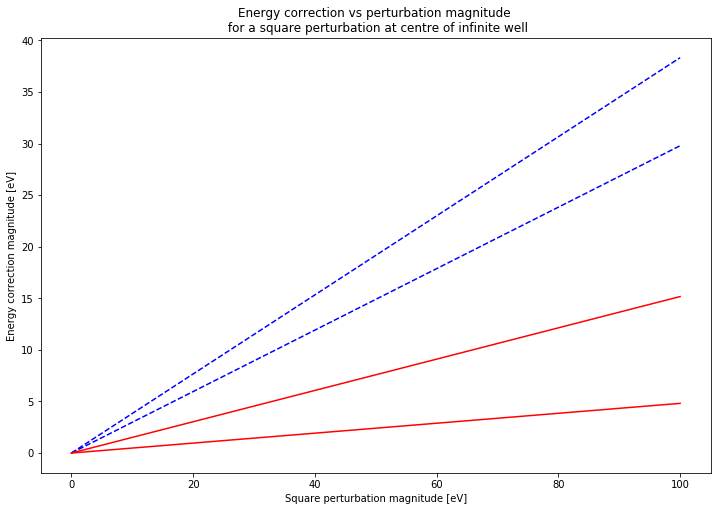

In [2]:
def delta_E(n, Vmax, w):
    """
    Function to return the first order energy correction (in eV) for different 
    square perturbation magnitudes
    
    Returns:
        delta : array
                contains the first order energy corrections over different square 
                perturbation magnitudes
            
    Parameters:
        w : float
            width of the square perturbation
        
        Vmax : float
               the maximum square perturbation. first order energy corrections will be 
               calculated up to this magnitude
               
        n : integer
            the principle quantum number
    """
    
    if not type(n) == int:
        raise TypeError('The parameter n should be an integer')
        
    else: 
        delta = np.empty(NV)
    
        for v in range(0, NV):
            delta[v] = firstperturb(n, v * Vstep, w) / e
    
        return delta

Vmax = 100 * e #the maximum perturbation magnitude we will sample
NV = 100 #number of perturbation magnitudes we'll sample
Vstep = Vmax / NV #increment in perturbation magnitude

delta_V = np.linspace(0, Vmax, NV)

fig, ax = plt.subplots(1, figsize = (12, 8))

ax.plot(delta_V / e, delta_E(1, Vmax, w), 'b--')
ax.plot(delta_V / e, delta_E(2, Vmax, w), 'r')
ax.plot(delta_V / e, delta_E(3, Vmax, w), 'b--')
ax.plot(delta_V / e, delta_E(4, Vmax, w), 'r')
ax.set_xlabel('Square perturbation magnitude [eV]')
ax.set_ylabel('Energy correction magnitude [eV]')
ax.set_title('Energy correction vs perturbation magnitude \n for a square perturbation at centre of infinite well')

plt.show()

You will notice that the energy of states with odd quantum numbers are affected by the perturbation more than even states. This is because the position of the perturbation is at the centre of the well and it does not cover a large amount of the well (only a fifth of it). For odd quantum states, there is a much higher probability of the particle existing at the centre of the well than for even quantum states as we saw on our plots of the probability distribution earlier. A central perturbation therefore affects these states more.

For higher quantum states, the difference in the effect of the perturbation on odd and even states reduces because the probability distribution oscillates so frequently, making the probability distribution between different states less distinguishable.